In [1]:
import re
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runSOG5x5_NewIC/SOG5x5_1ts_20041019_20041023_ptrc_T.nc')
fkeys=f.variables.keys()
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
tz,zt=np.meshgrid((t-t[0])/3600/24,-z[:])

In [3]:
print(t[0:5]-t[0])

[   0.   40.   80.  120.  160.]


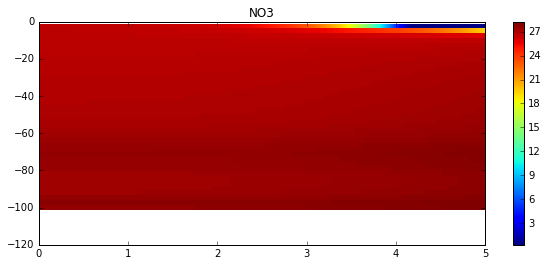

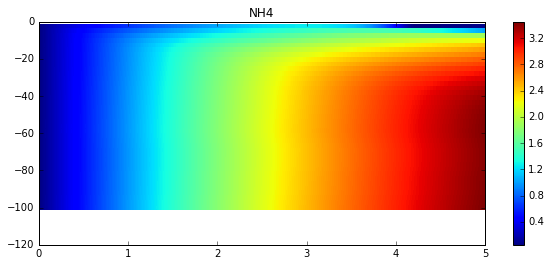

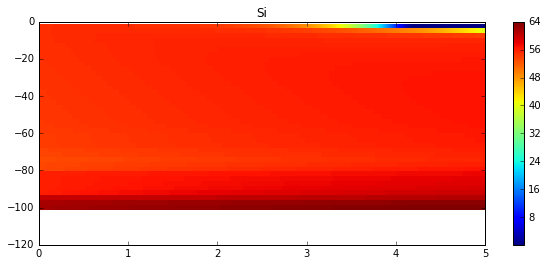

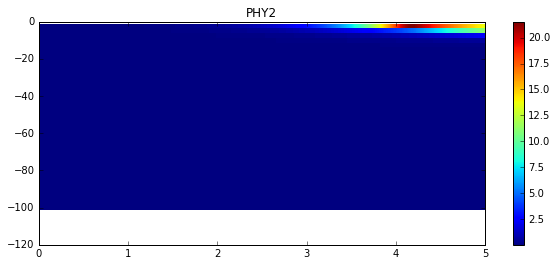

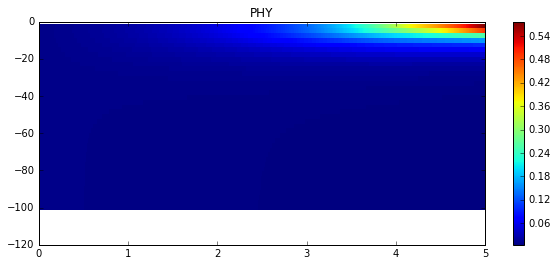

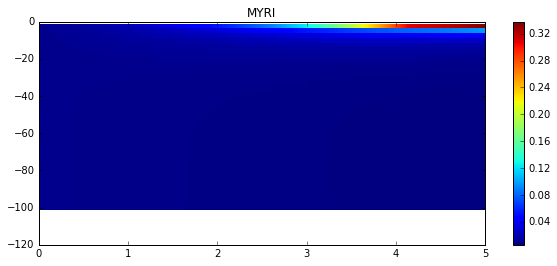

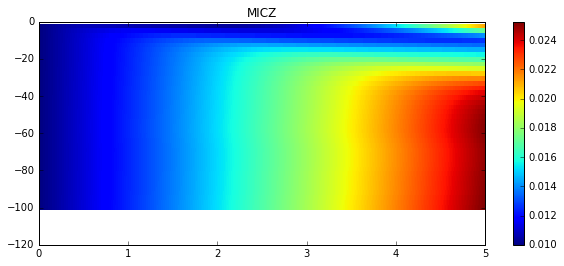

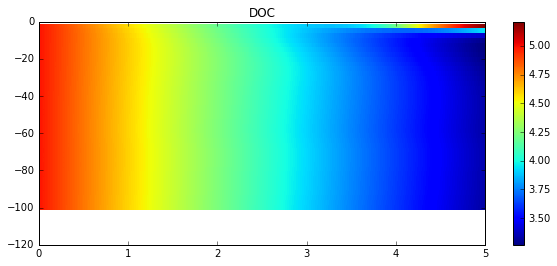

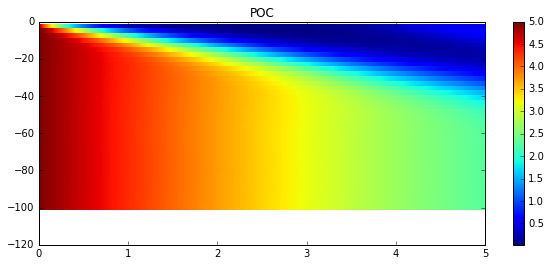

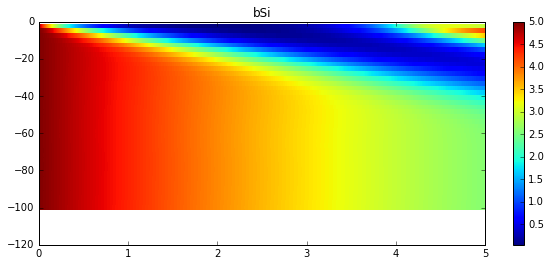

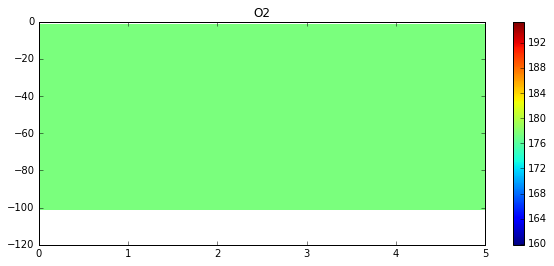

In [4]:
for ik in fkeys:
    if np.size(f.variables[ik].shape)==4:
        fig, axs = plt.subplots(1,1,figsize=(10,4))
        mesh=plt.pcolormesh(tz[:3600*24*1,:],zt[:3600*24*1,:],f.variables[ik][:3600*24*1,:,2,2].T)
        plt.colorbar()
        plt.title(ik)